In [1]:
# Установка всех нужных библиотек
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, cv, Pool

The name of each column and what it is responsible for 

!!! A basement is not a basement, but a ground floor, like a groundfloor, and the first floor is called the one above it, like 2, as in Russia


id - we can say that the index for each record is
MSSubClass is a building class that is measured in numbers, each number is this type of building
MSZoning - each abbreviation designates the type of area in which the building is located 
LotFrontage - the length of the street in feet connected to the property.
LotArea - the size of the plot in square feet
Street - type of access road to the property.
Alley - the type of driveway to the property.
LotShape - general form of ownership 
LandContour - flatness of the site 
Utilities - type of available utilities
LotConfig - the configuration of the house, how many facades it has, that is, how many sides it has open (other houses cover the facades)
LandSlope - the slope of the site 
Neighborhood - a physical location within the city of Ames
Condition1 - proximity to various conditions, i.e. some kind of park, railway station 
Condition2 is the same as condition1, only if 
there are several of them, the second one that is next to it is indicated in this column.
BldgType - type of living space 
HouseStyle - the style of a dwelling, that is, how many floors there are and how many of them are completed 
OverallQual - what is the condition of the materials? 
OverallCond - assessment of the overall condition of the house 
YearBuilt - year of construction 
YearRemodAdd - date of reconstruction (coincides with the date of construction, if redevelopment or additions were not carried out)
RoofStyle - type of roof
RoofMatl - the material from which the roof is made 
Exterior1st - exterior coating of the house 
Exterior2nd - exterior coating of a house, if it consists of more than one material. 
MasVnrType - type of stone masonry cladding 
MasVnrArea - masonry cladding area in square feet
Exterior - assessment of the quality of the material on the outside 
Externcond - evaluates the current state of the material on the external surface
Foundation - the type of foundation 
BsmtQual - evaluates the height of the first floor, each category corresponds to a specific list, which includes several values
BsmtCond - evaluates the general condition of the first floor
BSMTEXPOSITION - refers to walls at the level of a passage or garden
BsmtFinType1 - estimate of the finished ground floor area
BsmtFinSF1 - ground floor in square feet 
BsmtFinType2 - estimate the area of the finished ground floor, if there are several options. 
BsmtFinSF2 - ground floor area if there are several options
BsmtUnfSF - the area of the unfinished ground floor in square feet
TotalBsmtSF - the total area of the first floor 
Heating - type of heating 
HeatingQC - heating quality and condition of it all 
CentralAir - whether or not there is central air conditioning 
Electrical - a type of electrical system, that is, what it includes
1stFlrSF - the area of the first (second) floor
2ndFlrSF - the area of the second (third) floor
LowQualFinSF - low quality finishes in square feet
GrLivArea - the area of the living space, not counting the ground floor 
BsmtFullBath - is there a toilet with a bathtub on the ground floor
BsmtHalfBath - is there just a toilet on the ground floor
FullBath - how many towers with a bathroom above the first floor
HalfBath - how many toilets are above the ground floor?
Bedroom - are there any bedrooms, not including the first floor
Kitchen - how many kitchens are there in total
KitchenQual - the condition of the kitchen
TotRmsAbvGrd - how many rooms are there in total, not counting toilets and baths
Functional - home functionality (assumed to be typical, unless deductions are required)
Fireplaces - the number of fireplaces
FireplaceQu - the condition of fireplaces
GarageType - location of the garage 
GarageYrBlt - the year the garage was built
GarageFinish - garage interior decoration
GarageCars - how many cars can fit in a garage
GarageArea - garage area in square feet
GarageQual - garage quality
GarageCond - the condition of the garage
PavedDrive - the type of driveway for entering the garage
WoodDeckSF - the area of wooden flooring in square feet
OpenPorchSF - outdoor veranda area in square feet
EnclosedPorch - the area of the covered porch in square feet
3SsnPorch - the area of the veranda for three seasons in square feet
ScreenPorch - the area of the porch with a grid in square feet
PoolArea - the area of the pool in square feet
PoolQC - pool status
Fence - fence condition
MiscFeature - other functions not included in other categories, such as a second garage, a tennis court on site, an elevator inside the house, etc.
MiscVal - the cost of these other functions in dollars
MoSold - month of sale
YrSold - year of sale
SaleType - type of sale
SaleCondition - terms of sale

***Loading the main dataframe and initial analysis***

In [5]:
#Загружаю таблицу
data = pd.read_csv('train.csv')

In [7]:
#Вывожу первые 10 срочек таблицы
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
#Общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
#Общая информация о числах в таблице
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [13]:
#Создание листа со всеми категориальными данными 
category = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
            'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
            'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
            'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

**Checking for gaps and eliminating them**

In [16]:
#Построение таблицы со всеми признаками, которые имеют пропуски
data_passes = data.isna().sum().reset_index()
data_passes.columns = ['feature', 'passes']
data_passes = data_passes[data_passes['passes']>0]
data_passes = data_passes.assign(passes_percentage=(data_passes['passes']/data.shape[0])*100)
data_passes

,feature,passes,passes_percentage
3,LotFrontage,259,17.739726
6,Alley,1369,93.767123
25,MasVnrType,872,59.726027
26,MasVnrArea,8,0.547945
30,BsmtQual,37,2.534247
31,BsmtCond,37,2.534247
32,BsmtExposure,38,2.602740
33,BsmtFinType1,37,2.534247
35,BsmtFinType2,38,2.602740
42,Electrical,1,0.068493


In [18]:
#Удалаю строки с пропусками в признаках MasVnrArea и Electrical
#Что сильно не повлияет на выборку, так как вместе эти пропуски составляют <1% от всех данных
data = data.dropna(subset=['MasVnrArea', 'Electrical']).reset_index().drop(columns='index')

In [20]:
#Заменяю все пропуски в этих признаках на константну, так как в описании данных написано, что пропуски означают отсутствие
data['Alley'] = data['Alley'].fillna('no alley')
data['MasVnrType'] = data['MasVnrType'].fillna('nothing')
data['FireplaceQu'] = data['FireplaceQu'].fillna('no fireplace')
data['PoolQC'] = data['PoolQC'].fillna('no pool')
data['Fence'] = data['Fence'].fillna('no fence')
data['MiscFeature'] = data['MiscFeature'].fillna('nothing')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [22]:
#Тоже самое и с этими пропусками
list_of_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for i in list_of_basement:
    data[i] = data[i].fillna('no basement')

In [24]:
#И с этими
list_of_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in list_of_garage:
    data[i] = data[i].fillna('no garage')

In [26]:
#Создаю отдельную таблицу, в которой кодирую все категориальные данные для модели
encoder = ce.BinaryEncoder(cols=category)
data_encoded = encoder.fit_transform(data)

In [28]:
#Заполняю пропуски в оставшемся признаки за счет RandomForestRegressor
imputer = IterativeImputer(
    estimator=RandomForestRegressor(),
    max_iter=10,                       
    random_state=12345                  
)

data_imputed = imputer.fit_transform(data_encoded)
data_without_passes = pd.DataFrame(data_imputed, columns=data_encoded.columns)

In [29]:
#Меняю столбец с пропусками на столбец без пропусков
data['LotFrontage'] = data_without_passes['LotFrontage']

In [30]:
#Снова проверяю датафрейм на пропуски
data_passes = data.isna().sum().reset_index()
data_passes.columns = ['feature', 'passes']
data_passes = data_passes[data_passes['passes']>0]
data_passes = data_passes.assign(passes_percentage=(data_passes['passes']/data.shape[0])*100)
data_passes

,feature,passes,passes_percentage


***Checking for duplicates***

In [32]:
#Проверка всей таблицы, исключая признак Id, на схожие строки 
data[data.duplicated(subset=data.columns.difference(['Id']))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


***Creating new features***

In [34]:
#Общее количество ван и туалетов в доме
data = data.assign(AllFullBath = data['BsmtFullBath'] + data['FullBath'])
data = data.assign(AllHalfBath = data['BsmtHalfBath'] + data['HalfBath'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AllFullBath,AllHalfBath
0,1,60,RL,65.0,8450,Pave,no alley,Reg,Lvl,AllPub,...,no fence,nothing,0,2,2008,WD,Normal,208500,3,1
1,2,20,RL,80.0,9600,Pave,no alley,Reg,Lvl,AllPub,...,no fence,nothing,0,5,2007,WD,Normal,181500,2,1
2,3,60,RL,68.0,11250,Pave,no alley,IR1,Lvl,AllPub,...,no fence,nothing,0,9,2008,WD,Normal,223500,3,1
3,4,70,RL,60.0,9550,Pave,no alley,IR1,Lvl,AllPub,...,no fence,nothing,0,2,2006,WD,Abnorml,140000,2,0
4,5,60,RL,84.0,14260,Pave,no alley,IR1,Lvl,AllPub,...,no fence,nothing,0,12,2008,WD,Normal,250000,3,1


In [35]:
#Общая площадь дома без учета гаражей и разных типов веранд
data = data.assign(AllSquare = data['TotalBsmtSF'] + data['GrLivArea'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AllFullBath,AllHalfBath,AllSquare
0,1,60,RL,65.0,8450,Pave,no alley,Reg,Lvl,AllPub,...,nothing,0,2,2008,WD,Normal,208500,3,1,2566
1,2,20,RL,80.0,9600,Pave,no alley,Reg,Lvl,AllPub,...,nothing,0,5,2007,WD,Normal,181500,2,1,2524
2,3,60,RL,68.0,11250,Pave,no alley,IR1,Lvl,AllPub,...,nothing,0,9,2008,WD,Normal,223500,3,1,2706
3,4,70,RL,60.0,9550,Pave,no alley,IR1,Lvl,AllPub,...,nothing,0,2,2006,WD,Abnorml,140000,2,0,2473
4,5,60,RL,84.0,14260,Pave,no alley,IR1,Lvl,AllPub,...,nothing,0,12,2008,WD,Normal,250000,3,1,3343


In [36]:
#Подсчет общего количества веранд и их суммарной площади
porches = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
data['Count_of_porches'] = 0
for i in range(data.shape[0]):
    counter = 0
    for x in porches:
        if data.loc[i, x] > 0: counter+=1
    data.loc[i, 'Count_of_porches'] = counter
    counter = 0

data = data.assign(Area_of_all_porches = sum([data[x] for x in porches]))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AllFullBath,AllHalfBath,AllSquare,Count_of_porches,Area_of_all_porches
0,1,60,RL,65.0,8450,Pave,no alley,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,3,1,2566,1,61
1,2,20,RL,80.0,9600,Pave,no alley,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,2,1,2524,0,0
2,3,60,RL,68.0,11250,Pave,no alley,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,3,1,2706,1,42
3,4,70,RL,60.0,9550,Pave,no alley,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,2,0,2473,2,307
4,5,60,RL,84.0,14260,Pave,no alley,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,3,1,3343,1,84


In [37]:
#Площадь всех строений на территории 
data = data.assign(AbsAllSquare = data['Area_of_all_porches'] + data['AllSquare'] + data['GarageArea'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,AllFullBath,AllHalfBath,AllSquare,Count_of_porches,Area_of_all_porches,AbsAllSquare
0,1,60,RL,65.0,8450,Pave,no alley,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,3,1,2566,1,61,3175
1,2,20,RL,80.0,9600,Pave,no alley,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,2,1,2524,0,0,2984
2,3,60,RL,68.0,11250,Pave,no alley,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,3,1,2706,1,42,3356
3,4,70,RL,60.0,9550,Pave,no alley,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,2,0,2473,2,307,3422
4,5,60,RL,84.0,14260,Pave,no alley,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,3,1,3343,1,84,4263


***Checking the relationship between attributes and target***

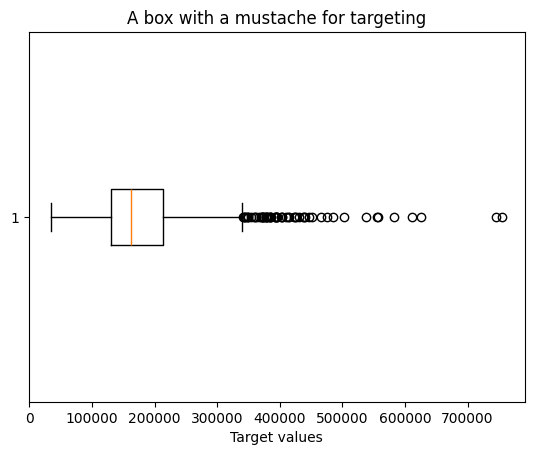

In [39]:
#Построения ящика с усами для того, чтобы увидеть есть ли выбросы в таргете
plt.boxplot(data['SalePrice'], vert=False)
plt.title("A box with a mustache for targeting")
plt.xlabel("Target values")
plt.show()

In [40]:
#Очистка таргета от выбросов, чтобы это не влияло на распределение 
Q1 = np.percentile(data['SalePrice'], 25)
Q3 = np.percentile(data['SalePrice'], 75)
IQR = Q3 - Q1
data = data[(data['SalePrice'] < (Q3 + 1.5 * IQR)) & (data['SalePrice'] > (Q1 - 1.5 * IQR))]

In [41]:
#Сброс индексов
data = data.reset_index().drop(columns=['Id', 'index'])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,AllFullBath,AllHalfBath,AllSquare,Count_of_porches,Area_of_all_porches,AbsAllSquare
0,60,RL,65.0,8450,Pave,no alley,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500,3,1,2566,1,61,3175
1,20,RL,80.0,9600,Pave,no alley,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500,2,1,2524,0,0,2984
2,60,RL,68.0,11250,Pave,no alley,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500,3,1,2706,1,42,3356
3,70,RL,60.0,9550,Pave,no alley,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000,2,0,2473,2,307,3422
4,60,RL,84.0,14260,Pave,no alley,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000,3,1,3343,1,84,4263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,60,RL,62.0,7917,Pave,no alley,Reg,Lvl,AllPub,Inside,...,2007,WD,Normal,175000,2,1,2600,1,40,3100
1387,20,RL,85.0,13175,Pave,no alley,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,210000,3,0,3615,0,0,4115
1388,70,RL,66.0,9042,Pave,no alley,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,266500,2,0,3492,1,60,3804
1389,20,RL,68.0,9717,Pave,no alley,Reg,Lvl,AllPub,Inside,...,2010,WD,Normal,142125,2,0,2156,1,112,2508


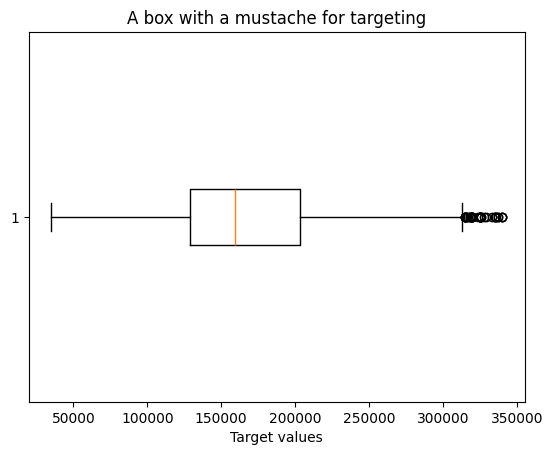

In [42]:
#Проверка
plt.boxplot(data['SalePrice'], vert=False)
plt.title("A box with a mustache for targeting")
plt.xlabel("Target values")
plt.show()

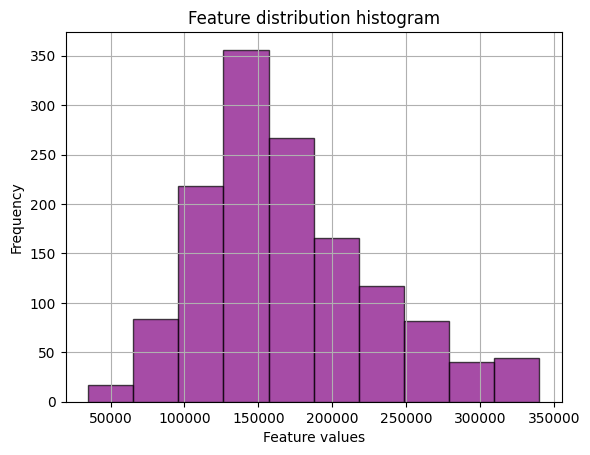

'Abnormal distribution'

In [43]:
#Проверка типа данных у таргета(параметрические или непараметрические)
data['SalePrice'].hist(bins=10, color='purple', edgecolor='black', alpha=0.7)
plt.title("Feature distribution histogram")
plt.xlabel("Feature values")
plt.ylabel("Frequency")
plt.show()

stat, p_value = stats.shapiro(data['SalePrice'])
if p_value > 0.05:
    display(f'Normal distribution')
else:
    display(f'Abnormal distribution')

In [44]:
#Создание функции для проведения теста Краскела-Уоллиса, данные у нас заведомо непараметрические, потому что у таргета не нормальное распределние  
def test_kruskal(category, target):
    groups = [group[target].values for name, group in data.groupby(category)]
    stat, p_value = stats.kruskal(*groups)
    if p_value < 0.05:
        display(f"There are statistically significant differences between the groups in {category}")
    else:
        display(f"There are no statistically significant differences between the groups in {category}")
        display(f"p-value: {p_value:.4f}")

In [45]:
#Проведение теста Краскела-Уоллиса для всех категориальных данных
for i in category:
    test_kruskal(i, 'SalePrice')

'There are statistically significant differences between the groups in MSZoning'

'There are no statistically significant differences between the groups in Street'

'p-value: 0.1018'

'There are statistically significant differences between the groups in Alley'

'There are statistically significant differences between the groups in LotShape'

'There are statistically significant differences between the groups in LandContour'

'There are no statistically significant differences between the groups in Utilities'

'p-value: 0.5592'

'There are statistically significant differences between the groups in LotConfig'

'There are no statistically significant differences between the groups in LandSlope'

'p-value: 0.2024'

'There are statistically significant differences between the groups in Neighborhood'

'There are statistically significant differences between the groups in Condition1'

'There are statistically significant differences between the groups in Condition2'

'There are statistically significant differences between the groups in BldgType'

'There are statistically significant differences between the groups in HouseStyle'

'There are statistically significant differences between the groups in RoofStyle'

'There are no statistically significant differences between the groups in RoofMatl'

'p-value: 0.0538'

'There are statistically significant differences between the groups in Exterior1st'

'There are statistically significant differences between the groups in Exterior2nd'

'There are statistically significant differences between the groups in MasVnrType'

'There are statistically significant differences between the groups in ExterQual'

'There are statistically significant differences between the groups in ExterCond'

'There are statistically significant differences between the groups in Foundation'

'There are statistically significant differences between the groups in BsmtQual'

'There are statistically significant differences between the groups in BsmtCond'

'There are statistically significant differences between the groups in BsmtExposure'

'There are statistically significant differences between the groups in BsmtFinType1'

'There are statistically significant differences between the groups in BsmtFinType2'

'There are statistically significant differences between the groups in Heating'

'There are statistically significant differences between the groups in HeatingQC'

'There are statistically significant differences between the groups in CentralAir'

'There are statistically significant differences between the groups in Electrical'

'There are statistically significant differences between the groups in KitchenQual'

'There are statistically significant differences between the groups in Functional'

'There are statistically significant differences between the groups in FireplaceQu'

'There are statistically significant differences between the groups in GarageType'

'There are statistically significant differences between the groups in GarageFinish'

'There are statistically significant differences between the groups in GarageQual'

'There are statistically significant differences between the groups in GarageCond'

'There are statistically significant differences between the groups in PavedDrive'

'There are no statistically significant differences between the groups in PoolQC'

'p-value: 0.2387'

'There are statistically significant differences between the groups in Fence'

'There are statistically significant differences between the groups in MiscFeature'

'There are statistically significant differences between the groups in SaleType'

'There are statistically significant differences between the groups in SaleCondition'

In [46]:
#Очистка выборки от категориальных признаков, которые не сильно влияют на итоговую цену 
data = data.drop(columns=['Street', 'Utilities', 'LandSlope', 'RoofMatl', 'PoolQC'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,YrSold,SaleType,SaleCondition,SalePrice,AllFullBath,AllHalfBath,AllSquare,Count_of_porches,Area_of_all_porches,AbsAllSquare
0,60,RL,65.0,8450,no alley,Reg,Lvl,Inside,CollgCr,Norm,...,2008,WD,Normal,208500,3,1,2566,1,61,3175
1,20,RL,80.0,9600,no alley,Reg,Lvl,FR2,Veenker,Feedr,...,2007,WD,Normal,181500,2,1,2524,0,0,2984
2,60,RL,68.0,11250,no alley,IR1,Lvl,Inside,CollgCr,Norm,...,2008,WD,Normal,223500,3,1,2706,1,42,3356
3,70,RL,60.0,9550,no alley,IR1,Lvl,Corner,Crawfor,Norm,...,2006,WD,Abnorml,140000,2,0,2473,2,307,3422
4,60,RL,84.0,14260,no alley,IR1,Lvl,FR2,NoRidge,Norm,...,2008,WD,Normal,250000,3,1,3343,1,84,4263


In [47]:
#Создание списка с количественными признаками 
not_category = [x for x in data.columns if x not in category]
data[not_category].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1391 non-null   int64  
 1   LotFrontage          1391 non-null   float64
 2   LotArea              1391 non-null   int64  
 3   OverallQual          1391 non-null   int64  
 4   OverallCond          1391 non-null   int64  
 5   YearBuilt            1391 non-null   int64  
 6   YearRemodAdd         1391 non-null   int64  
 7   MasVnrArea           1391 non-null   float64
 8   BsmtFinSF1           1391 non-null   int64  
 9   BsmtFinSF2           1391 non-null   int64  
 10  BsmtUnfSF            1391 non-null   int64  
 11  TotalBsmtSF          1391 non-null   int64  
 12  1stFlrSF             1391 non-null   int64  
 13  2ndFlrSF             1391 non-null   int64  
 14  LowQualFinSF         1391 non-null   int64  
 15  GrLivArea            1391 non-null   i

In [48]:
#Создание функции для рассчета коэффициента корреляции Спирмена
def corr_spearmanr(feature, target):
    corr, p_value = stats.spearmanr(data[target], data[feature])
    if p_value < 0.05:
        display(f'There is a relationship between {feature} and the target')
    else:
        display(f'There is no dependency between {feature} and the target')
        display(f'p-value: {p_value:.4f}')

In [49]:
#Проверка зависимости между количественными признаками и таргетом с помощью непараметрического теста
for i in not_category:
    corr_spearmanr(i, 'SalePrice')

'There is no dependency between MSSubClass and the target'

'p-value: 0.3050'

'There is a relationship between LotFrontage and the target'

'There is a relationship between LotArea and the target'

'There is a relationship between OverallQual and the target'

'There is a relationship between OverallCond and the target'

'There is a relationship between YearBuilt and the target'

'There is a relationship between YearRemodAdd and the target'

'There is a relationship between MasVnrArea and the target'

'There is a relationship between BsmtFinSF1 and the target'

'There is no dependency between BsmtFinSF2 and the target'

'p-value: 0.3604'

'There is a relationship between BsmtUnfSF and the target'

'There is a relationship between TotalBsmtSF and the target'

'There is a relationship between 1stFlrSF and the target'

'There is a relationship between 2ndFlrSF and the target'

'There is a relationship between LowQualFinSF and the target'

'There is a relationship between GrLivArea and the target'

'There is a relationship between BsmtFullBath and the target'

'There is no dependency between BsmtHalfBath and the target'

'p-value: 0.8843'

'There is a relationship between FullBath and the target'

'There is a relationship between HalfBath and the target'

'There is a relationship between BedroomAbvGr and the target'

'There is a relationship between KitchenAbvGr and the target'

'There is a relationship between TotRmsAbvGrd and the target'

'There is a relationship between Fireplaces and the target'

'There is a relationship between GarageYrBlt and the target'

'There is a relationship between GarageCars and the target'

'There is a relationship between GarageArea and the target'

'There is a relationship between WoodDeckSF and the target'

'There is a relationship between OpenPorchSF and the target'

'There is a relationship between EnclosedPorch and the target'

'There is a relationship between 3SsnPorch and the target'

'There is a relationship between ScreenPorch and the target'

'There is a relationship between PoolArea and the target'

'There is no dependency between MiscVal and the target'

'p-value: 0.0558'

'There is a relationship between MoSold and the target'

'There is no dependency between YrSold and the target'

'p-value: 0.2885'

'There is a relationship between SalePrice and the target'

'There is a relationship between AllFullBath and the target'

'There is a relationship between AllHalfBath and the target'

'There is a relationship between AllSquare and the target'

'There is a relationship between Count_of_porches and the target'

'There is a relationship between Area_of_all_porches and the target'

'There is a relationship between AbsAllSquare and the target'

In [50]:
#Очистка выборки
data = data.drop(columns='MSSubClass')

***Test dataframe download and initial analysis***

In [52]:
#Загрузка таблицы и вывод первый строк 
data_test = pd.read_csv('test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [53]:
#Общая информация о таблице
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [54]:
#Числовая информация о таблице
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


**Checking for gaps and eliminating them**

In [56]:
#Построение таблицы со всеми признаками, которые имеют пропуски
data_passes = data_test.isna().sum().reset_index()
data_passes.columns = ['feature', 'passes']
data_passes = data_passes[data_passes['passes']>0]
data_passes = data_passes.assign(passes_percentage=(data_passes['passes']/data_test.shape[0])*100)
data_passes

,feature,passes,passes_percentage
2,MSZoning,4,0.274160
3,LotFrontage,227,15.558602
6,Alley,1352,92.666210
9,Utilities,2,0.137080
23,Exterior1st,1,0.068540
24,Exterior2nd,1,0.068540
25,MasVnrType,894,61.274846
26,MasVnrArea,15,1.028101
30,BsmtQual,44,3.015764
31,BsmtCond,45,3.084304


In [57]:
#Заменяю все пропуски в этих признаках на константну, так как в описании данных написано, что пропуски означают отсутствие
data_test['Alley'] = data_test['Alley'].fillna('no alley')
data_test['MasVnrType'] = data_test['MasVnrType'].fillna('nothing')
data_test['FireplaceQu'] = data_test['FireplaceQu'].fillna('no fireplace')
data_test['PoolQC'] = data_test['PoolQC'].fillna('no pool')
data_test['Fence'] = data_test['Fence'].fillna('no fence')
data_test['MiscFeature'] = data_test['MiscFeature'].fillna('nothing')
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].fillna(0)

In [58]:
#Тоже самое и с этими пропусками
list_of_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for i in list_of_basement:
    data_test[i] = data_test[i].fillna('no basement')

In [59]:
#И с этими
list_of_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in list_of_garage:
    data_test[i] = data_test[i].fillna('no garage')

In [60]:
#Построение таблицы со всеми признаками, которые имеют пропуски
data_passes = data_test.isna().sum().reset_index()
data_passes.columns = ['feature', 'passes']
data_passes = data_passes[data_passes['passes']>0]
data_passes = data_passes.assign(passes_percentage=(data_passes['passes']/data_test.shape[0])*100)
data_passes

,feature,passes,passes_percentage
2,MSZoning,4,0.274160
3,LotFrontage,227,15.558602
9,Utilities,2,0.137080
23,Exterior1st,1,0.068540
24,Exterior2nd,1,0.068540
26,MasVnrArea,15,1.028101
34,BsmtFinSF1,1,0.068540
36,BsmtFinSF2,1,0.068540
37,BsmtUnfSF,1,0.068540
38,TotalBsmtSF,1,0.068540


In [61]:
#Выясняю можно ли удалить все строки с оставшимся пропусками (кроме признака LotFrontage)
list_of_columns = list(data_passes['feature'])
list_of_columns = [x for x in list_of_columns if x not in ['LotFrontage', 'MSZoning']]

data_concat = data_test[data_test['MSZoning'].isna() == 1]
for i in list_of_columns:
    data_concat = pd.concat([data_concat, data_test[data_test[i].isna() ==1]], ignore_index=True)
data_concat = data_concat.drop_duplicates()

f'The ratio of missing rows in all columns (except LotFrontage) in the test sample to the entire test sample {data_concat.shape[0]/data_test.shape[0]:.5f}'

'The ratio of missing rows in all columns (except LotFrontage) in the test sample to the entire test sample 0.01851'

In [62]:
#Удаляю эти строки, так как они составляют <5% от всей выборки
columns = [x for x in list(data_passes['feature']) if x != 'LotFrontage']
for i in columns:
    data_test = data_test.dropna(subset=[i])
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,no alley,Reg,Lvl,AllPub,...,120,0,no pool,MnPrv,nothing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,MnPrv,nothing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,no alley,IR1,Lvl,AllPub,...,0,0,no pool,no fence,nothing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,no alley,IR1,HLS,AllPub,...,144,0,no pool,no fence,nothing,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,nothing,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,nothing,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,no fence,nothing,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,no alley,Reg,Lvl,AllPub,...,0,0,no pool,MnPrv,Shed,700,7,2006,WD,Normal


In [63]:
#Сброс индексов 
data_test = data_test.reset_index().drop(columns=['Id', 'index'])
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,no alley,Reg,Lvl,AllPub,Inside,...,120,0,no pool,MnPrv,nothing,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,no alley,IR1,Lvl,AllPub,Corner,...,0,0,no pool,no fence,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,no alley,IR1,Lvl,AllPub,Inside,...,0,0,no pool,MnPrv,nothing,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,no alley,IR1,Lvl,AllPub,Inside,...,0,0,no pool,no fence,nothing,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,no alley,IR1,HLS,AllPub,Inside,...,144,0,no pool,no fence,nothing,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,160,RM,21.0,1936,Pave,no alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,no fence,nothing,0,6,2006,WD,Normal
1428,160,RM,21.0,1894,Pave,no alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,no fence,nothing,0,4,2006,WD,Abnorml
1429,20,RL,160.0,20000,Pave,no alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,no fence,nothing,0,9,2006,WD,Abnorml
1430,85,RL,62.0,10441,Pave,no alley,Reg,Lvl,AllPub,Inside,...,0,0,no pool,MnPrv,Shed,700,7,2006,WD,Normal


In [64]:
#Создаю отдельную таблицу, в которой кодирую все категориальные данные для модели
encoder = ce.BinaryEncoder(cols=category)
data_encoded = encoder.fit_transform(data_test)

In [65]:
#Заполняю пропуски в оставшемся признаки за счет RandomForestRegressor
imputer = IterativeImputer(
    estimator=RandomForestRegressor(),
    max_iter=10,                       
    random_state=12345                  
)

data_imputed = imputer.fit_transform(data_encoded)
data_without_passes = pd.DataFrame(data_imputed, columns=data_encoded.columns)

In [66]:
#Меняю столбец с пропусками на столбец без пропусков
data_test['LotFrontage'] = data_without_passes['LotFrontage']

In [67]:
#Последняя проверки на пропуски
data_passes = data_test.isna().sum().reset_index()
data_passes.columns = ['feature', 'passes']
data_passes = data_passes[data_passes['passes']>0]
data_passes = data_passes.assign(passes_percentage=(data_passes['passes']/data_test.shape[0])*100)
data_passes

,feature,passes,passes_percentage


***Checking for duplicates***

In [69]:
#Проверка всей таблицы на дубликаты
data_test[data_test.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


***Creating new features and removing those that are not strongly related to the target***

In [71]:
#Общее количество ван и туалетов в доме
data_test = data_test.assign(AllFullBath = data_test['BsmtFullBath'] + data_test['FullBath'])
data_test = data_test.assign(AllHalfBath = data_test['BsmtHalfBath'] + data_test['HalfBath'])

In [72]:
#Общая площадь дома без учета гаражей и разных типов веранд
data_test = data_test.assign(AllSquare = data_test['TotalBsmtSF'] + data_test['GrLivArea'])

In [73]:
#Подсчет общего количества веранд и их суммарной площади
porches = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
data_test['Count_of_porches'] = 0
for i in range(data_test.shape[0]):
    counter = 0
    for x in porches:
        if data_test.loc[i, x] > 0: counter+=1
    data_test.loc[i, 'Count_of_porches'] = counter
    counter = 0

data_test = data_test.assign(Area_of_all_porches = sum([data_test[x] for x in porches]))

In [74]:
#Площадь всех строений на территории 
data_test = data_test.assign(AbsAllSquare = data_test['Area_of_all_porches'] + data_test['AllSquare'] + data_test['GarageArea'])
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,AllFullBath,AllHalfBath,AllSquare,Count_of_porches,Area_of_all_porches,AbsAllSquare
0,20,RH,80.0,11622,Pave,no alley,Reg,Lvl,AllPub,Inside,...,6,2010,WD,Normal,1.0,0.0,1778.0,1,120,2628.0
1,20,RL,81.0,14267,Pave,no alley,IR1,Lvl,AllPub,Corner,...,6,2010,WD,Normal,1.0,1.0,2658.0,1,36,3006.0
2,60,RL,74.0,13830,Pave,no alley,IR1,Lvl,AllPub,Inside,...,3,2010,WD,Normal,2.0,1.0,2557.0,1,34,3073.0
3,60,RL,78.0,9978,Pave,no alley,IR1,Lvl,AllPub,Inside,...,6,2010,WD,Normal,2.0,1.0,2530.0,1,36,3036.0
4,120,RL,43.0,5005,Pave,no alley,IR1,HLS,AllPub,Inside,...,1,2010,WD,Normal,2.0,0.0,2560.0,2,226,3292.0


In [75]:
#Удаление признаков, которые слабо связаны с таргетом
data_test = data_test.drop(columns=['MSSubClass', 'Street', 'Utilities', 'LandSlope', 'RoofMatl', 'PoolQC'])
data_test.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,MoSold,YrSold,SaleType,SaleCondition,AllFullBath,AllHalfBath,AllSquare,Count_of_porches,Area_of_all_porches,AbsAllSquare
0,RH,80.0,11622,no alley,Reg,Lvl,Inside,NAmes,Feedr,Norm,...,6,2010,WD,Normal,1.0,0.0,1778.0,1,120,2628.0
1,RL,81.0,14267,no alley,IR1,Lvl,Corner,NAmes,Norm,Norm,...,6,2010,WD,Normal,1.0,1.0,2658.0,1,36,3006.0
2,RL,74.0,13830,no alley,IR1,Lvl,Inside,Gilbert,Norm,Norm,...,3,2010,WD,Normal,2.0,1.0,2557.0,1,34,3073.0
3,RL,78.0,9978,no alley,IR1,Lvl,Inside,Gilbert,Norm,Norm,...,6,2010,WD,Normal,2.0,1.0,2530.0,1,36,3036.0
4,RL,43.0,5005,no alley,IR1,HLS,Inside,StoneBr,Norm,Norm,...,1,2010,WD,Normal,2.0,0.0,2560.0,2,226,3292.0


***Separation of the main sample***

In [77]:
#Создание таргета
target = data['SalePrice']
data = data.drop(columns='SalePrice')
display(target.shape)
data.shape

(1391,)

(1391, 79)

In [78]:
#Создание валидационной выборки 
data_train, data_valid, target_train, target_valid = train_test_split(data, target, test_size=0.25, random_state=12345)

display(data_train.shape)
display(data_valid.shape)

display(target_train.shape)
target_valid.shape

(1043, 79)

(348, 79)

(1043,)

(348,)

***Categorical data encoding***

In [80]:
#Создание списка названий категориальных данных 
category_data = [x for x in category if x not in ['MSSubClass', 'Street', 'Utilities', 'LandSlope', 'RoofMatl', 'PoolQC']]
data[category_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1391 non-null   object
 1   Alley          1391 non-null   object
 2   LotShape       1391 non-null   object
 3   LandContour    1391 non-null   object
 4   LotConfig      1391 non-null   object
 5   Neighborhood   1391 non-null   object
 6   Condition1     1391 non-null   object
 7   Condition2     1391 non-null   object
 8   BldgType       1391 non-null   object
 9   HouseStyle     1391 non-null   object
 10  RoofStyle      1391 non-null   object
 11  Exterior1st    1391 non-null   object
 12  Exterior2nd    1391 non-null   object
 13  MasVnrType     1391 non-null   object
 14  ExterQual      1391 non-null   object
 15  ExterCond      1391 non-null   object
 16  Foundation     1391 non-null   object
 17  BsmtQual       1391 non-null   object
 18  BsmtCond       1391 non-null

In [81]:
#Кодирование категориальных признаков
encoder = ce.BinaryEncoder(cols=category_data)
data_train = encoder.fit_transform(data_train)
data_valid = encoder.transform(data_valid)
data_test = encoder.transform(data_test)

In [82]:
#Сброс индексов 
data_train = data_train.reset_index(drop=True)
data_valid = data_valid.reset_index(drop=True)

***Data scaling***

In [84]:
#Масштабирование данных
scaler = StandardScaler() 
data_train = pd.DataFrame(scaler.fit_transform(data_train), columns=data_train.columns)
data_valid = pd.DataFrame(scaler.transform(data_valid), columns=data_valid.columns)
data_test = pd.DataFrame(scaler.transform(data_test), columns=data_test.columns)

***Creating a model***

In [86]:
#ищу наилучшее количество итераций
train_data = Pool(data=data_train, label=target_train)
#создаю словарь с параметрами для модели 
params = {
    'random_seed' : 12345,
    'verbose' : 1000,
    'eval_metric' : 'MAPE',
    'loss_function' : 'RMSE',
    'learning_rate': 0.09
}
cv_data = cv(
    params=params,
    pool = train_data,
    fold_count = 5,
    shuffle=True,
    partition_random_seed=0,
    verbose=False,
    early_stopping_rounds=200)

Training on fold [0/5]

bestTest = 0.09239859404
bestIteration = 878

Training on fold [1/5]

bestTest = 0.0890022275
bestIteration = 422

Training on fold [2/5]

bestTest = 0.08160567886
bestIteration = 305

Training on fold [3/5]

bestTest = 0.07873483397
bestIteration = 625

Training on fold [4/5]

bestTest = 0.07243770946
bestIteration = 347



In [87]:
n_iter = cv_data[cv_data['test-MAPE-mean'] == cv_data['test-MAPE-mean'].min()]['iterations'].values[0]
n_iter

413

In [88]:
#проверка модели на валидационной выборке
params = {
    'random_seed' : 12345,
    'verbose' : 1000,
    'eval_metric' : 'MAPE',
    'loss_function' : 'RMSE',
    'learning_rate': 0.08,
    'iterations': n_iter
}
model = CatBoostRegressor(**params)
model.fit(train_data)
predict = model.predict(data_valid)
mean_absolute_error(target_valid, predict)

0:	learn: 0.2968323	total: 2.35ms	remaining: 968ms
412:	learn: 0.0269587	total: 682ms	remaining: 0us


12473.554081462677

In [89]:
#предсказывание цен в тестовой выборке
params = {
    'random_seed' : 12345,
    'verbose' : 1000,
    'eval_metric' : 'MAPE',
    'loss_function' : 'RMSE',
    'learning_rate': 0.08,
    'iterations': n_iter
}
model = CatBoostRegressor(**params)
model.fit(train_data)
target_test = model.predict(data_test)

0:	learn: 0.2968323	total: 1.91ms	remaining: 788ms
412:	learn: 0.0269587	total: 679ms	remaining: 0us


***Conclusion: I uploaded the main sample and conducted a general analysis to understand what I'm dealing with. Then I checked the gaps, they turned out to be in the sample, so the gaps in some features were deleted, since the total amount of data is very small, I filled in some with stubs, since the gaps in some features are explained in the description, the remaining part was filled in by RandomForestRegressor. After the omissions, I started checking for duplicates, they were not in the main sample. Then I added new features, removed outliers and features that are not strongly related to the target. After processing the main sample, I did the same with the test sample. After all two samples were cleared, I divided the data, after which I got three pairs: a training sample and its target, a validation sample and its target, and just a test sample without a target. Then I started encoding categorical data, after which I scaled all the samples. And in the end, I trained the model and predicted the data for the test sample.***